## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
dados = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
dados.head()
X = dados.drop(columns=['medv']).copy()
y = dados['medv']

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

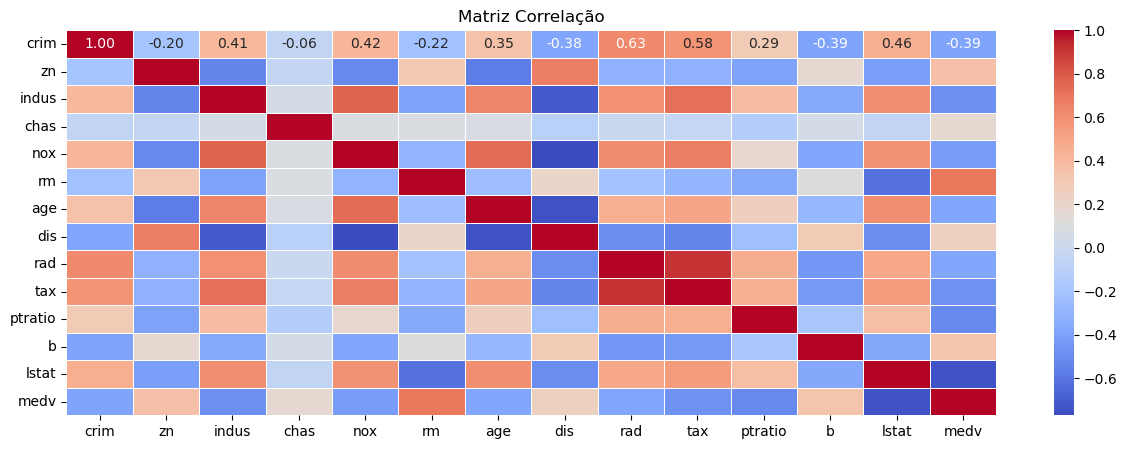

In [37]:
matriz_correlacao = dados.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz Correlação')
plt.show()

In [38]:
X = dados.drop(columns=['medv']).copy()
y = dados['medv']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [39]:
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X_train, y_train)
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [40]:
modelos = [regr_1, regr_2]
for modelo in modelos:
    mse_treino = mean_squared_error(y_train, modelo.predict(X_train))
    mse_teste = mean_squared_error(y_test, modelo.predict(X_test))
    print(f"MSE treino depth={modelo.get_depth()}: {mse_treino}")
    print(f"MSE teste depth={modelo.get_depth()}: {mse_teste}")

MSE treino depth=8: 1.021670409005186
MSE teste depth=8: 18.892001234038695
MSE treino depth=2: 20.199091277115325
MSE teste depth=2: 26.94687595484856


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [120]:
regr = DecisionTreeRegressor(random_state=42)
regr.fit(X_train, y_train)
path = regr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("Primeiro CCP Alpha:", ccp_alphas[0])
print("Ultimo CCP Alpha:", ccp_alphas[-1])

Primeiro CCP Alpha: 0.0
Ultimo CCP Alpha: 46.40295884719934


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [57]:
trees = [DecisionTreeRegressor(random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [62]:
mse_values = [mean_squared_error(y_test, tree.predict(X_test)) for tree in trees]
print(mse_values)

[18.642540983606565, 18.642540983606565, 18.642540983606565, 18.642540983606565, 18.6463524590164, 18.6463524590164, 18.6463524590164, 18.6463524590164, 18.6463524590164, 18.6463524590164, 18.6463524590164, 18.647766393442627, 18.647766393442627, 18.644036885245907, 18.644036885245907, 18.644036885245907, 18.64245901639345, 18.64245901639345, 18.643709016393448, 18.64397313296904, 18.64397313296904, 18.64848132969035, 18.64848132969035, 18.64856329690347, 18.64856329690347, 18.64856329690347, 18.64856329690347, 18.64856329690347, 18.646022313296907, 18.654464936247727, 18.662377049180332, 18.661682604735887, 18.661682604735887, 18.661682604735887, 18.694080145719496, 18.694080145719496, 18.7046539162113, 18.7046539162113, 18.697707194899824, 18.697707194899824, 18.698035063752283, 18.685509448998186, 18.696497791438986, 18.692563365209477, 18.698792873406198, 18.6771535291439, 18.670029212204014, 18.664562454462665, 18.675129394353373, 18.63910765027323, 18.63910765027323, 18.647635519

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

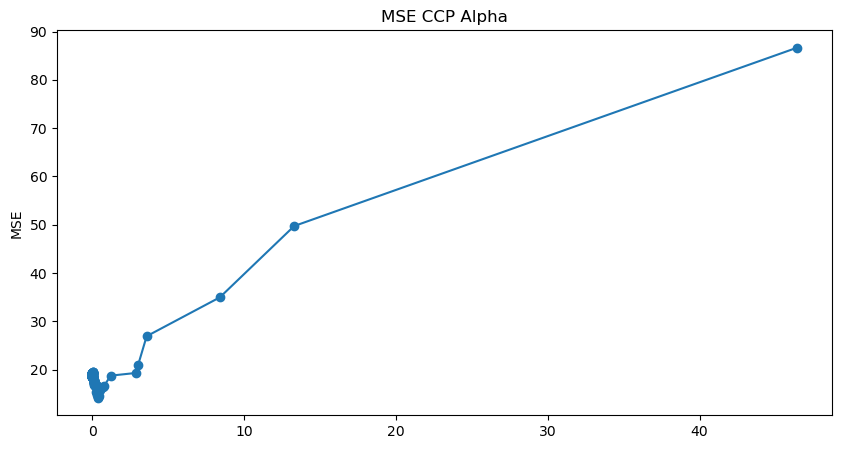

Alpha Otimo: 0.3826430143014009


In [125]:
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, mse_values, marker='o')
plt.ylabel("MSE")
plt.title("MSE CCP Alpha")
plt.show()
optimal_alpha = ccp_alphas[np.argmin(mse_values)]
print("Alpha Otimo:", optimal_alpha)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [128]:
optimal_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha).fit(X_train, y_train)
r_squared = optimal_tree.score(X_test, y_test)
print("R-quadrado Otimo:", r_squared)

R-quadrado Otimo: 0.8349222971176764


### 7. Visualize esta árvore.

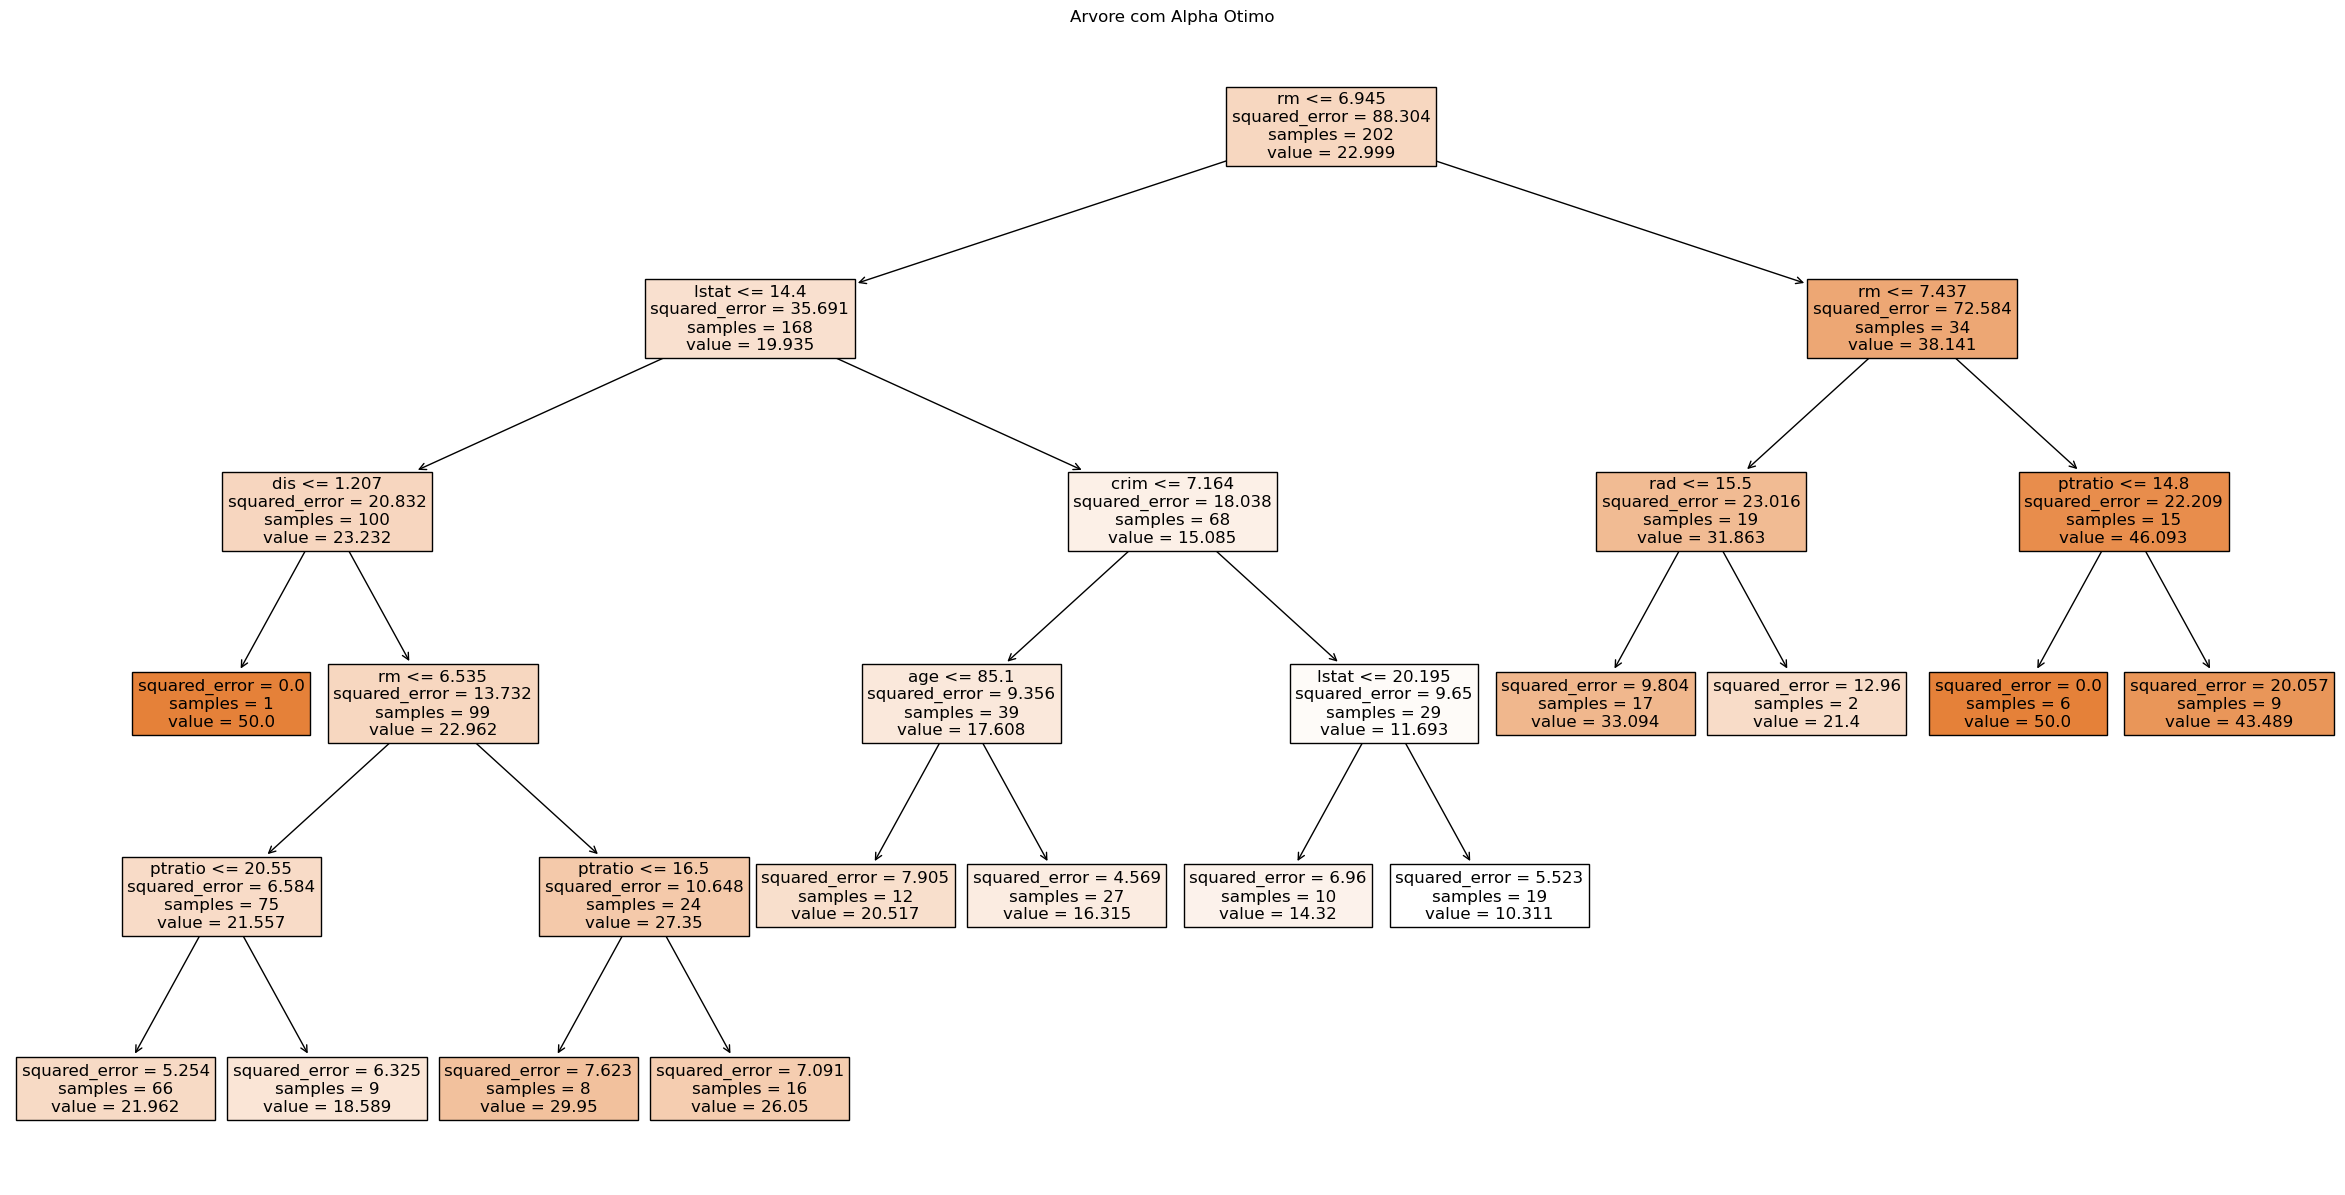

In [150]:
plt.figure(figsize=(30, 15))
plot_tree(optimal_tree, filled=True, feature_names=list(X.columns), fontsize=12)
plt.title("Arvore com Alpha Otimo")
plt.show()